<a href="https://colab.research.google.com/github/majo581/TALLERES/blob/main/1_taller_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/1_Taller_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Lineal**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

-Yuli Esquivel Martinez  

-Maria Jose Gonzalez


**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Reg_Lineal_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

29 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

Contexto: Tu Primer Proyecto en AutoAnalitica 📈 🚗

¡Felicitaciones! Has sido contratado como Científico de Datos Junior en AutoAnalitica, una firma de consultoría líder que asesora a grandes concesionarios de autos usados en el país.

Tu primer proyecto es construir un prototipo de modelo de pricing inteligente. La gerencia de uno de nuestros clientes principales está preocupada porque sus agentes de ventas tasan los vehículos que reciben basándose únicamente en su intuición, lo que genera precios inconsistentes y pérdida de oportunidades.

El objetivo: Desarrollar un modelo de machine learning que pueda predecir el precio de venta justo de un automóvil basándose en sus características (antigüedad, kilómetros recorridos, tipo de combustible, etc.). Esta herramienta no busca reemplazar al vendedor, sino darle un precio base, basado en datos, para hacer ofertas más rápidas, justas y competitivas. Tu misión hoy es construir el primer modelo base y evaluar su precisión.

# 1. Importar librerías necesarias

In [ ]:
### TU CÓDIGO AQUÍ ###
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelamiento
import statsmodels.api as sm  # Para el enfoque econométrico (inferencia)
from sklearn.datasets import fetch_california_housing # Dataset
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.linear_model import LinearRegression # Modelo de ML (predicción)
from sklearn.metrics import mean_squared_error, r2_score # Métricas de evaluación

# Pruebas de Supuestos
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Mejorar visualización de dataframes y gráficos

In [ ]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Cargar el dataset `car data.csv`.

- Car_Name: The name of each car.
- Year: The year that the car was bought.
- Selling_Price: The price that the car has at the sale time (thousands of USD). **Esta es la variable objetivo.**
- Present_Price: The price that car has right now (thousands of USD).
- Kms_Driven: The number of kilometers that the car is driven.
- Fuel_Type: The type of fuel that the car consumes.
- Seller_Type: The type of car seller: individual or dealer.
- Transmission: The type of the car gear: manual or automatic.
- Owner: The number of previous owners of the car.

In [ ]:
# Carga el dataset
### TU CÓDIGO AQUÍ ###
dataset=pd.read_csv('car data.csv')

In [ ]:
# Mostrar las primeras filas para entender la estructura
### TU CÓDIGO AQUÍ ###
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Análisis Exploratorio de Datos (EDA) y preparación de datos

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Revisa si hay filas duplicadas y elíminalas
### TU CÓDIGO AQUÍ ###
print(f"Número de filas antes de eliminar duplicados: {dataset.shape[0]}")
dataset.drop_duplicates(inplace=True)
print(f"Número de filas después de eliminar duplicados: {dataset.shape[0]}")

Número de filas antes de eliminar duplicados: 299
Número de filas después de eliminar duplicados: 299


In [ ]:
# Muestras las estadísticas descriptivas
### TU CÓDIGO AQUÍ ###
display(dataset.describe())

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.00,299.00,299.00,299.00,299.00
mean,"2,013.62",4.59,7.54,"36,916.75",0.04
std,2.90,4.98,8.57,"39,015.17",0.25
min,"2,003.00",0.10,0.32,500.00,0.00
25%,"2,012.00",0.85,1.20,"15,000.00",0.00
50%,"2,014.00",3.51,6.10,"32,000.00",0.00
75%,"2,016.00",6.00,9.84,"48,883.50",0.00
max,"2,018.00",35.00,92.60,"500,000.00",3.00


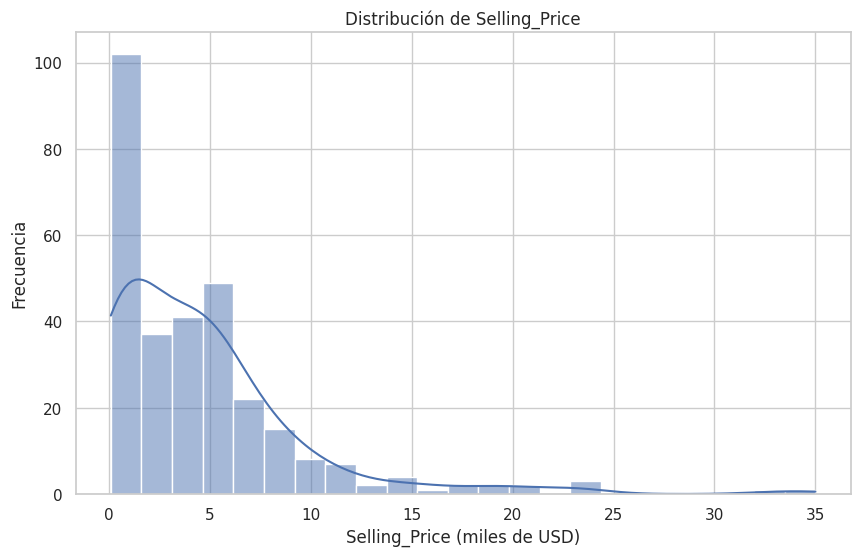

In [ ]:
# Grafica un histograma para ver la distribución de la variable objetivo "Selling_Price"
### TU CÓDIGO AQUÍ ###
sns.histplot(dataset['Selling_Price'], kde=True)
plt.title('Distribución de Selling_Price')
plt.xlabel('Selling_Price (miles de USD)')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los autos se venden a precios bajos, principalmente entre 0 y 5 mil USD. A medida que el precio aumenta, la frecuencia de ventas disminuye, lo que indica que hay pocos autos con precios altos. La distribución está sesgada hacia la derecha, lo que significa que existen algunos vehículos con precios mucho mayores al promedio. En general, esto muestra que el mercado está dominado por autos económicos y solo una pequeña parte corresponde a autos más costosos.

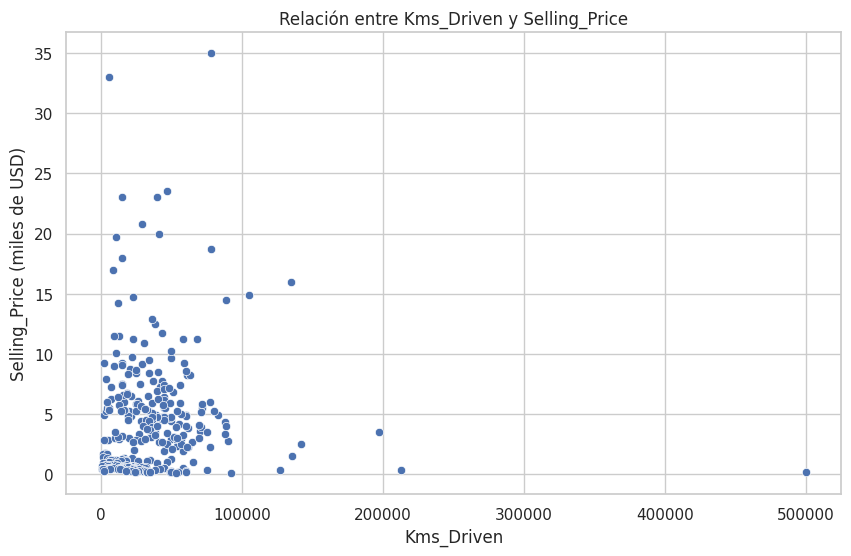

In [ ]:
# Visualiza la relación entre 'Kms_Driven' y 'Selling_Price'
### TU CÓDIGO AQUÍ ###
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=dataset)
plt.title('Relación entre Kms_Driven y Selling_Price')
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price (miles de USD)')
plt.show()

Basado en el gráfico, ¿qué tipo de relación observas? ¿Es lo que esperabas económicamente?

En el gráfico se observa una relación negativa entre el número de kilómetros recorridos (Kms_Driven) y el precio de venta (Selling_Price). Es decir, a medida que un auto tiene más kilómetros recorridos, su precio de venta tiende a ser menor.

Esto coincide con lo esperado económicamente, ya que los autos con más uso suelen tener mayor desgaste y menor valor en el mercado, mientras que los vehículos con menos kilómetros suelen venderse a precios más altos por estar en mejor estado

In [ ]:
# Crea la variable "Car_Age" que será la resta entre el año actual y el año del carro
### TU CÓDIGO AQUÍ ###
current_year = 2024  # Puedes cambiar esto al año actual si es necesario
dataset['Car_Age'] = current_year - dataset['Year']

In [ ]:
# Elimina la columna 'Car_Name' que no usaremos
### TU CÓDIGO AQUÍ ###
dataset = dataset.drop('Car_Name', axis=1)

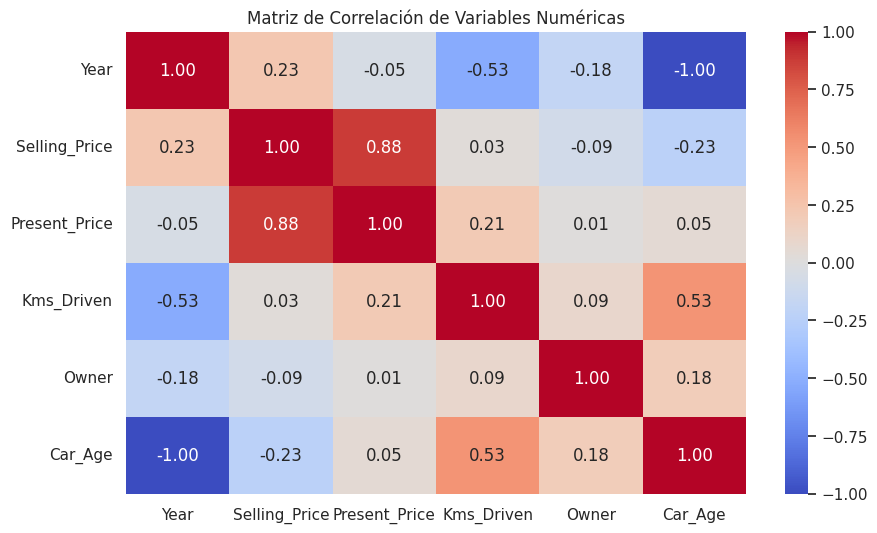

In [ ]:
# Calcula la matriz de correlación para las variables numéricas y grafica el heatmap
### TU CÓDIGO AQUÍ ###
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Escribe tus conclusiones aquí.

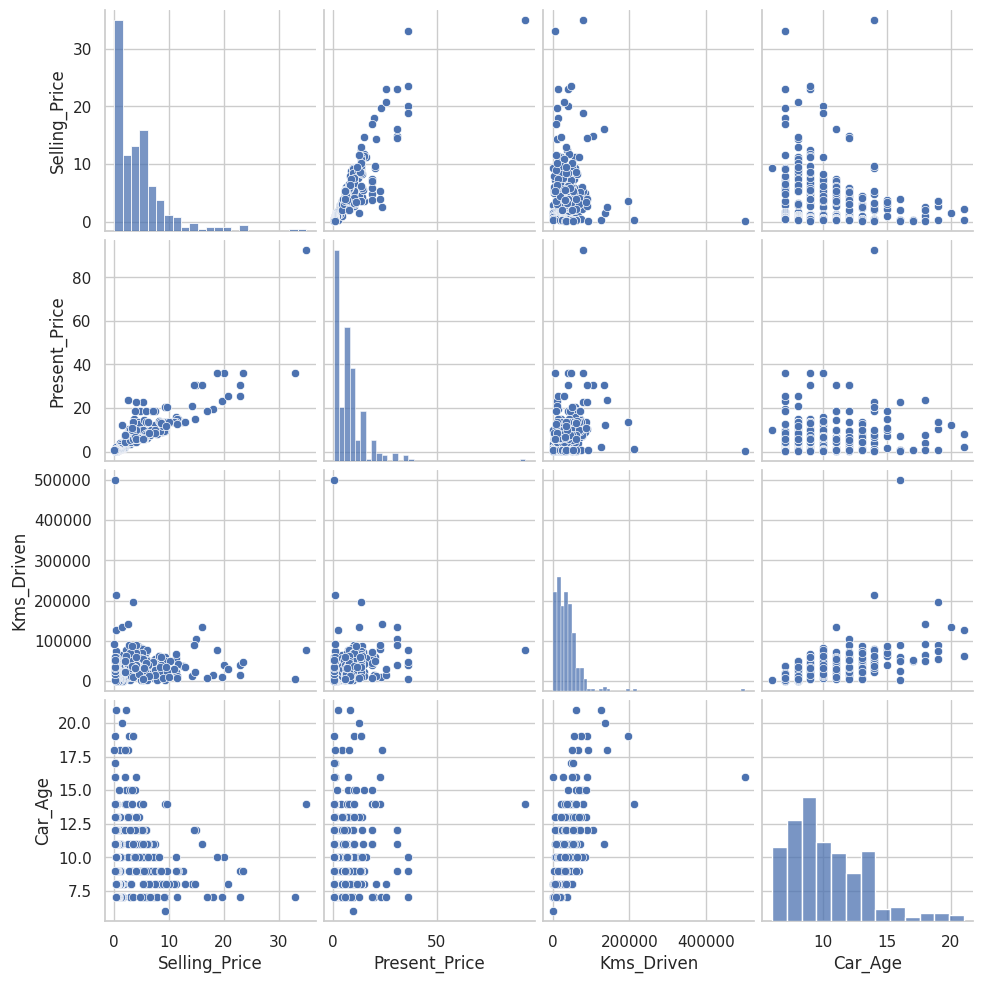

In [ ]:
# Realiza un gráfico de pairplot para ver el comportamiento de las variables independientes y la dependiente "Selling_Price"
### TU CÓDIGO AQUÍ ###
sns.pairplot(dataset[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']])
plt.show()

Escribe tus conclusiones aquí.

In [ ]:
# Convierte variables categóricas a numéricas para que el modelo las entienda.
# La regresión lineal no puede trabajar con texto ('Petrol', 'Dealer').
# Usaremos One-Hot Encoding con pd.get_dummies() para convertirlas.
# drop_first=True es importante para evitar multicolinealidad perfecta en las variables dummy
### TU CÓDIGO AQUÍ ###
X = pd.get_dummies(X, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# 4. Construcción y Evaluación del Modelo

In [ ]:
# Define tus variables X e y
### TU CÓDIGO AQUÍ ###
y = dataset['Selling_Price']
X = dataset.drop('Selling_Price', axis=1)

In [ ]:
# Divide los datos en entrenamiento y prueba (80% / 20%)
### TU CÓDIGO AQUÍ ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Puedes cambiar el random_state

In [ ]:
# Entrena el modelo de Regresión Lineal
### TU CÓDIGO AQUÍ ###
# Apply one-hot encoding to training and testing sets separately
X_train = pd.get_dummies(X_train, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realiza predicciones sobre el conjunto de prueba
### TU CÓDIGO AQUÍ ###
y_pred = model.predict(X_test)

In [ ]:
# Calcula las métricas de evaluación (RMSE y R2) para entrenamiento y prueba y compáralas
### TU CÓDIGO AQUÍ ###


In [ ]:
# Calcula las métricas de evaluación (RMSE y R2) para entrenamiento y prueba y compáralas
### TU CÓDIGO AQUÍ ###

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)


y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print(f"Métricas de Evaluación:")
print(f"  RMSE (Test): {rmse_test:.2f}")
print(f"  R2 (Test): {r2_test:.2f}")
print(f"  RMSE (Train): {rmse_train:.2f}")
print(f"  R2 (Train): {r2_train:.2f}")

Métricas de Evaluación:
  RMSE (Test): 2.52
  R2 (Test): 0.75
  RMSE (Train): 1.53
  R2 (Train): 0.90


# 5. Conclusión para el Cliente

*Escribe un párrafo para los gerentes de 'AutoAnalitica'.*

1. Empieza explicando qué es el RMSE en términos sencillos (ej. "nuestro modelo se equivoca en promedio en..."). Recuerda que el precio en el dataset está en miles de dólares.


*Escribe un párrafo para los gerentes de 'AutoAnalitica'.*

1. Empieza explicando qué es el RMSE en términos sencillos (ej. "nuestro modelo se equivoca en promedio en..."). Recuerda que el precio en el dataset está en miles de dólares.

Nuestro primer modelo para predecir precios de autos usados tiene un error promedio de unos 2.52 miles de dólares, es decir, aproximadamente 2,520 dólares por auto. Esto significa que, en promedio, el modelo se equivoca esa cantidad al estimar el precio de venta.

2. Termina dando tu recomendación: ¿Es este modelo lo suficientemente bueno como un primer paso? ¿Para qué podría ser útil?

Este modelo es un buen primer paso para estimar precios de autos usados. Con un R² de 0.75, logra explicar gran parte de la variación en los precios, lo cual está bastante bien para una primera versión. Aunque el error promedio de unos 2,520 dólares muestra que todavía se puede mejorar, el modelo ya puede ayudar a los vendedores a definir precios más rápidos y coherentes.